In [2]:
import os
import os.path as osp
from glob import glob
from tqdm import tqdm
import time
import numpy as np

import cv2
from PIL import Image
from IPython.display import display

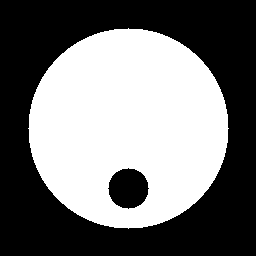

In [3]:
# img = np.zeros((256, 256), dtype=np.uint8)
img = np.zeros((256, 256, 3), dtype=np.uint8)

cv2.circle(img, (128, 128), 100, (255, 255, 255), -1)

# cv2.circle(img, (128, 128), 20, (0, 0, 0), -1)
cv2.circle(img, (128, 188), 20, (0, 0, 0), -1)

display(Image.fromarray(img))

## Closing operation

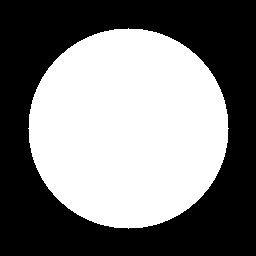

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (41, 41))
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

display(Image.fromarray(closing))

## Expand the lower part

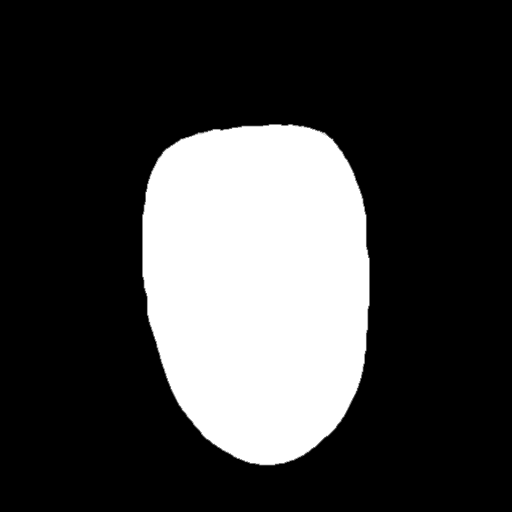

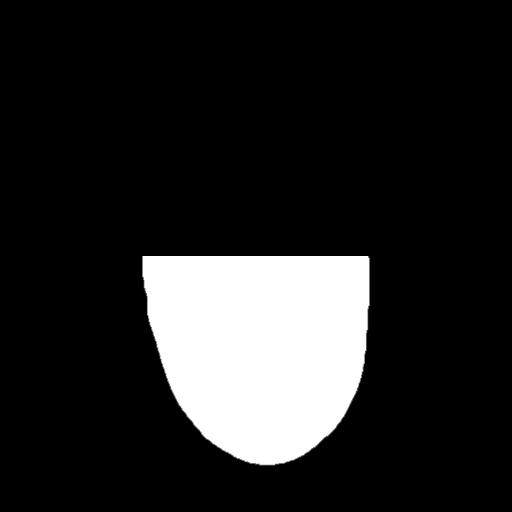

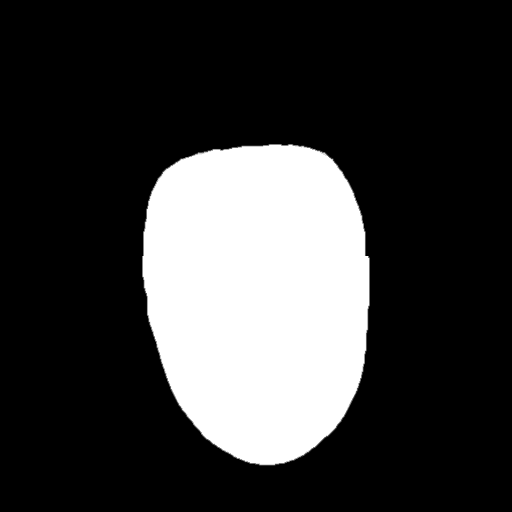

True

In [8]:
closing = cv2.imread("./temp_results/000335.png")

## 1) Dilate the whole image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 41))
img_dialate = cv2.dilate(closing, kernel=kernel, iterations=1)
display(Image.fromarray(img_dialate))

## 2) Combine with the upper part of the original one
half_mask = np.zeros_like(closing).astype(np.uint8)
half_mask[:256, ...] = 255

img_dialate_half = cv2.bitwise_and(img_dialate, 255 - half_mask)
display(Image.fromarray(img_dialate_half))

closing_half = cv2.bitwise_and(closing, half_mask)

final_mask = cv2.bitwise_or(img_dialate_half, closing_half)
display(Image.fromarray(final_mask))

cv2.imwrite("000335_final.png", final_mask)

## Erode operations

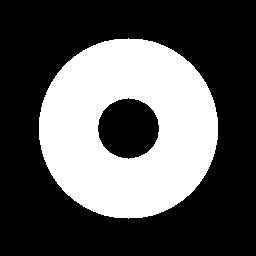

In [21]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21))
img_erode = cv2.erode(img, kernel=kernel, iterations=1)
display(Image.fromarray(img_erode))

## Dialation operations

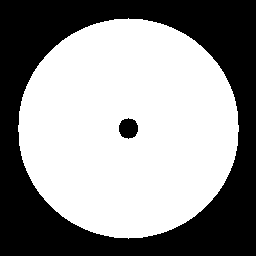

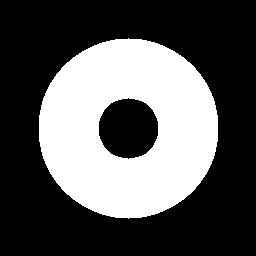

In [37]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21))
# kernel = np.ones((31, 31), dtype=np.uint8)
img_dialate = cv2.dilate(img, kernel=kernel, iterations=1)
display(Image.fromarray(img_dialate))

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (41, 41))
img_erode = cv2.erode(img_dialate, kernel=kernel, iterations=1)
display(Image.fromarray(img_erode))

## Directional Mophological Operations in OpenCV

In [ ]:
# img = np.zeros((256, 256), dtype=np.uint8)
img = np.zeros((256, 256, 3), dtype=np.uint8)

cv2.circle(img, (128, 128), 100, (255, 255, 255), -1)
cv2.circle(img, (128, 128), 20, (0, 0, 0), -1)

display(Image.fromarray(img))

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21))
# kernel = np.ones((31, 31), dtype=np.uint8)
img_dialate = cv2.dilate(img, kernel=kernel, iterations=1)
display(Image.fromarray(img_dialate))

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (41, 41))
img_erode = cv2.erode(img_dialate, kernel=kernel, iterations=1)
display(Image.fromarray(img_erode))

## Morphological operations in Kornia package

torch.Size([3, 3]) torch.int64
torch.Size([21, 21]) torch.int64
(256, 256) 0.0 255.0


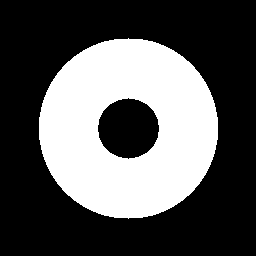

In [39]:
import torch
import kornia as K
import numpy as np
import cv2
from kornia import morphology as morph

device = 'cpu' # 'cuda:0' for GPU
kernel = torch.tensor([[0, 1, 0],[1, 1, 1],[0, 1, 0]]).to(device)
print(kernel.shape, kernel.dtype)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21))
kernel = torch.from_numpy(kernel).to(device)
kernel = kernel.to(torch.int64)
print(kernel.shape, kernel.dtype)

img = np.zeros((256, 256, 1), dtype=np.uint8)
cv2.circle(img, (128, 128), 100, (255, 255, 255), -1)
cv2.circle(img, (128, 128), 20, (0, 0, 0), -1)

img_tensor = torch.from_numpy(img.astype(np.float32)).to(device)
img_tensor = img_tensor / 255.0
img_tensor = img_tensor.permute(2, 0, 1)

eroded_image = morph.erosion(img_tensor[None], kernel) # Erosion

eroded_image = K.tensor_to_image(eroded_image.squeeze(0))
eroded_image *= 255.0
print(eroded_image.shape, eroded_image.min(), eroded_image.max())
eroded_image = eroded_image.astype(np.uint8)

display(Image.fromarray(eroded_image))

(512, 512, 3)


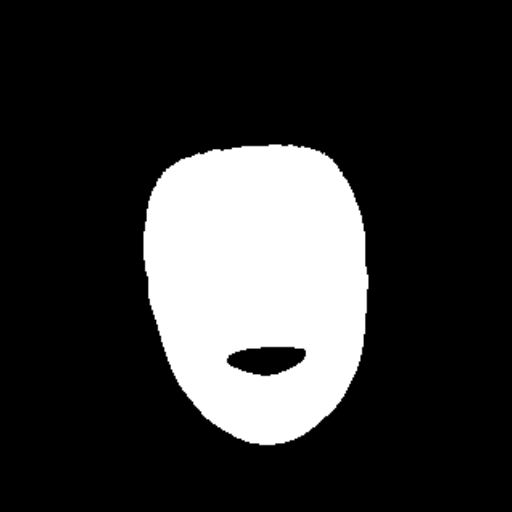

NameError: name 'torch' is not defined

In [3]:
mask_img = cv2.imread("/home/zhanghm/Research/Face/PIRender/temp_results/000335.png")
print(mask_img.shape)
display(Image.fromarray(mask_img))

mask_img = torch.from_numpy(mask_img.astype(np.float32)).to(device)
mask_img = mask_img / 255.0
mask_img = mask_img.permute(2, 0, 1)[None]

print(kernel.shape)

# dilated_image = morph.dilation(mask_img, kernel)
dilated_image = morph.closing(mask_img, kernel)

print(dilated_image.shape)

dilated_image = dilated_image * 255.0
dilated_image = dilated_image.permute(0, 2, 3, 1)
dilated_image = dilated_image.cpu().numpy().astype(np.uint8)

display(Image.fromarray(dilated_image[0]))